In [3]:
#cd Dropbox

In [4]:
cd Dropbox/Data visualization/Course 5/_32ec92f8b8c6d83a374ae0989bec1447_StepNOut

/Users/RI/Dropbox/Data visualization/Course 5/_32ec92f8b8c6d83a374ae0989bec1447_StepNOut


In [218]:
#import the packages we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
import scipy.stats
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

In [192]:
#load the full dataset
full_dataset = pd.read_csv('stepnout.csv')

In [7]:
#show the first ten rows of the dataset to get an idea of the variables and their values
full_dataset.head(10)

,cid,AGE,CHISP,CHETHN,cblack,casian,cnative,cwhite,cpacisl,cothrac,...,arst24tlfb_9,arst25tlfb_9,alctlfb_9,alc5tlfb_9,allarrests,anyarrest,alldrugs,anydrugs,allcrimes,anycrime
0,2180,30.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0
1,2181,26.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,2183,46.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2185,26.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0
4,2187,37.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2188,41.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,2189,45.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2191,30.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2192,29.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2193,35.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#rename all columns to small caps
full_dataset.rename(columns = lambda x: x.lower(), inplace=True)

In [9]:
#same result, different way of doing it
#full_dataset.columns = map(str.lower, full_dataset.columns)

In [10]:
#same result, different way of doing it
#df = df.rename(columns=lambda x: x.replace('$', ''))

In [11]:
#try to get all columns, one sees there are 691
full_dataset.columns

Index(['cid', 'age', 'chisp', 'chethn', 'cblack', 'casian', 'cnative',
       'cwhite', 'cpacisl', 'cothrac',
       ...
       'arst24tlfb_9', 'arst25tlfb_9', 'alctlfb_9', 'alc5tlfb_9', 'allarrests',
       'anyarrest', 'alldrugs', 'anydrugs', 'allcrimes', 'anycrime'],
      dtype='object', length=691)

In [12]:
#print all columns/variables
print(full_dataset.describe().to_string())

/Users/RI/Anaconda/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


               cid         age       chisp     chethn  cblack  casian  cnative  cwhite  cpacisl  cothrac     jailcnm      rtprrc      rtarrc      tcu001      tcu002      tcu003     tcu004a     tcu004b      tcu005     tcu006a     tcu006b     tcu006c      tcu007      tcu008      tcu009      tcutot     lcsf001     lcsf002     lcsf003     lcsf004     lcsf005     lcsf006     lcsf007     lcsf008     lcsf009     lcsf010     lcsf011     lcsf012     lcsf013     lcsfsc1     lcsfsc2     lcsfsc3     lcsf014     lcsf015        rctr        csex    dy30free   dy180free       clive      lngliv    homeless     suprliv       livsp       jobsp       numch     minorch       livch       supch      fostch      depend      cmstat      lngmst       grade          hs      votech         ged     workged     lngvtch     lngeduc      drvlic         job     finsup1      amtsup1     finsup2     finsup3     finsup4     finsup5      amtsup5     finsup6    amtsup6     finsup7      amtsup7     finsup8      amtsup8     

In [13]:
#initial exploratory data analysis
#frequency distributions for categorical variables
#graphical representations
#calculations of center and spread for quantitative variables

In [14]:
#we select 17 variables of interest
reduced_dataset = full_dataset[['cond', 'csex', 'age', 'clive', 'majsup',  'allarrests', 'anyarrest', 'alldrugs', 'anydrugs', 'allcrimes', 'anycrime',
                               'arrest_9mo', 'reincarc_9mo', 'num_arrest', 'num_reincarc', 'violent_charge',
                               'property_charge']]

In [15]:
#we take a look at the first 30 rows
reduced_dataset.head(30)

,cond,csex,age,clive,majsup,allarrests,anyarrest,alldrugs,anydrugs,allcrimes,anycrime,arrest_9mo,reincarc_9mo,num_arrest,num_reincarc,violent_charge,property_charge
0,1,1,30.0,5,11.0,2.0,1.0,2.0,1.0,2.0,1.0,1,1,2,2,0,0
1,1,1,26.0,5,11.0,0.0,0.0,1.0,1.0,1.0,1.0,1,1,1,1,1,0
2,1,1,46.0,4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,0,1,26.0,4,9.0,0.0,0.0,1.0,1.0,2.0,1.0,0,0,0,0,0,0
4,0,1,37.0,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,1,1,41.0,4,9.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0
6,1,1,45.0,5,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
7,0,1,30.0,4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
8,0,1,29.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
9,0,1,35.0,4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [16]:
#we check the length of the dataset
print(len(reduced_dataset))

476


In [17]:
#we confirm the number of columns
print(len(reduced_dataset.columns))

17


In [18]:
#we rename some of the columns to give them more meaningful names
reduced_dataset.rename(columns = {'csex': 'sex', 'clive': 'living_situation', 'majsup': 'support'}, inplace=True)

/Users/RI/Anaconda/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [19]:
#convert all variables to numeric ones

In [193]:
#mark all variables as numeric data, and signify, for the relevant ones, that they are categorical
#rather than quantitative variables
#errors='coerce' tells pandas to return invalid values as NaN rather than as the input values themselves
reduced_dataset['cond'] = pd.to_numeric(reduced_dataset['cond'], errors='coerce').astype('category')
reduced_dataset['sex'] = pd.to_numeric(reduced_dataset['sex'], errors='coerce').astype('category')
reduced_dataset['age'] = pd.to_numeric(reduced_dataset['age'], errors='coerce')
reduced_dataset['living_situation'] = pd.to_numeric(reduced_dataset['living_situation'], errors='coerce').astype('category')
reduced_dataset['support'] = pd.to_numeric(reduced_dataset['support'], errors='coerce').astype('category')
reduced_dataset['allarrests'] = pd.to_numeric(reduced_dataset['allarrests'], errors='coerce')
reduced_dataset['anyarrest'] = pd.to_numeric(reduced_dataset['anyarrest'], errors='coerce').astype('category')
reduced_dataset['alldrugs'] = pd.to_numeric(reduced_dataset['alldrugs'], errors='coerce')
reduced_dataset['anydrugs'] = pd.to_numeric(reduced_dataset['anydrugs'], errors='coerce').astype('category')
reduced_dataset['allcrimes'] = pd.to_numeric(reduced_dataset['allcrimes'], errors='coerce')
reduced_dataset['anycrime'] = pd.to_numeric(reduced_dataset['anycrime'], errors='coerce').astype('category')
reduced_dataset['arrest_9mo'] = pd.to_numeric(reduced_dataset['arrest_9mo'], errors='coerce').astype('category')
reduced_dataset['reincarc_9mo'] = pd.to_numeric(reduced_dataset['reincarc_9mo'], errors='coerce').astype('category')
reduced_dataset['num_arrest'] = pd.to_numeric(reduced_dataset['num_arrest'], errors='coerce')
reduced_dataset['num_reincarc'] = pd.to_numeric(reduced_dataset['num_reincarc'], errors='coerce')
reduced_dataset['violent_charge'] = pd.to_numeric(reduced_dataset['violent_charge'], errors='coerce').astype('category')
reduced_dataset['property_charge'] = pd.to_numeric(reduced_dataset['property_charge'], errors='coerce').astype('category')

In [21]:
#now let's look at the counts and frequency distributions for these variables
#for this, we will aim to get an idea of the shape, center, and spread of these variables
#we will analyze the shape visually by checking for modality and skewness
#we will check for measure of center such as mean, median and mode
#we will check the spread through the standard deviation

In [194]:
reduced_dataset['cond'].value_counts(sort=False, normalize = True)

0    0.489496
1    0.510504
Name: cond, dtype: float64

In [148]:
reduced_dataset['cond'].describe()

count     476
unique      2
top         1
freq      243
Name: cond, dtype: int64

In [24]:
#rules for visualizing data:

#for visualizing a variable: 
#if it is categorial we use a bar chart i.e. sns's countplot
#if it is quantitative, we can combine a kernel density estimate and a histogram with sns's 
#distplot function

#for visualizing two variables:
# C-C: bivariate bar graph with sns factorplot
# C-Q: bivariate bar graph with sns factorplot
# Q-Q: scatterplot with sns regplot

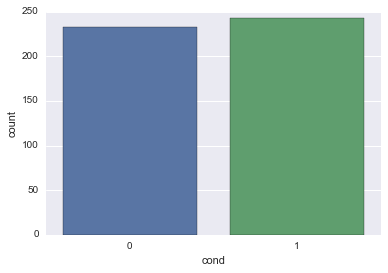

In [25]:
#given that the study condition is a categorical variable, we use a count plot to visualize it.
sns.countplot(x='cond', data=reduced_dataset)

In [26]:
#we check the counts per each value of the variable. sort=False tells pandas not to sort the results
#by values. normalize = True tells it to return the relative frequencies rather than the absolute counts
reduced_dataset['sex'].value_counts(sort=False, normalize=True)

1    0.829832
2    0.170168
Name: sex, dtype: float64

In [27]:
lis = [x for x in reduced_dataset['age']]
print(lis)

[30.0, 26.0, 46.0, 26.0, 37.0, 41.0, 45.0, 30.0, 29.0, 35.0, 35.0, 37.0, 24.0, 24.0, 32.0, 54.0, 24.0, 25.0, 29.0, 41.0, 30.0, 21.0, 37.0, 39.0, 28.0, 34.0, 19.0, 41.0, 24.0, 35.0, 27.0, 27.0, 40.0, 35.0, 23.0, 36.0, 36.0, 40.0, 24.0, 29.0, 22.0, 34.0, 23.0, 35.0, 36.0, 34.0, 40.0, 23.0, 44.0, 23.0, 28.0, 29.0, 45.0, 42.0, 41.0, 39.0, 35.0, 30.0, 31.0, 24.0, 26.0, 32.0, 24.0, 25.0, 34.0, 28.0, 39.0, 27.0, 31.0, 33.0, 27.0, 36.0, 33.0, 31.0, 24.0, 22.0, 33.0, 22.0, 35.0, 33.0, 29.0, 31.0, 45.0, 24.0, 39.0, 38.0, 44.0, 29.0, 36.0, 33.0, 46.0, 27.0, 22.0, 25.0, 31.0, 22.0, 38.0, 36.0, 35.0, nan, 22.0, nan, 36.0, 38.0, 43.0, 36.0, 38.0, 42.0, 44.0, 35.0, 44.0, 24.0, 27.0, 23.0, 41.0, 35.0, 25.0, 34.0, 45.0, 34.0, 24.0, 35.0, 59.0, 36.0, 30.0, 40.0, 20.0, 35.0, 32.0, 26.0, 27.0, 25.0, 28.0, 27.0, 30.0, 38.0, 41.0, 25.0, 40.0, 42.0, 34.0, 27.0, 36.0, 29.0, 27.0, 50.0, 43.0, 29.0, 44.0, 42.0, 25.0, 28.0, 41.0, 22.0, 59.0, 36.0, 32.0, 40.0, 25.0, 21.0, 38.0, 34.0, 40.0, 28.0, 25.0, 37.0, 41.0,

In [28]:
#the describe request gives us the count, mean, std, min, max, as well as the quartiles for the
#respective value distribution
reduced_dataset['age'].dropna().describe()

count    474.000000
mean      34.118143
std        8.836234
min       18.000000
25%       27.000000
50%       34.000000
75%       41.000000
max       61.000000
Name: age, dtype: float64

/Users/RI/Anaconda/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


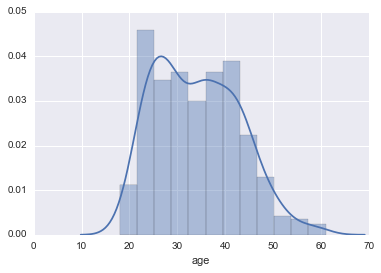

In [29]:
#given that age is a quantitative variable, we use a distplot to visualize it.
sns.distplot(reduced_dataset['age'].dropna())

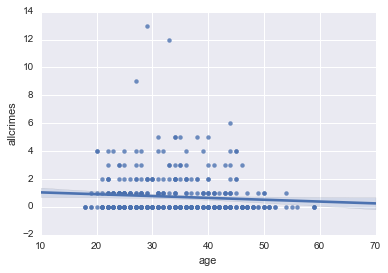

In [32]:
#We use a regplot to plot two quantitative variables, age and allcrimes, while also having a regression line suggesting
#any association present
sns.regplot(x='age', y='allcrimes', data=reduced_dataset)

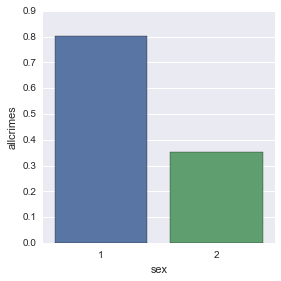

In [33]:
#categorical explanatory variable 'sex' and quantitative response variable 'allcrimes'
sns.factorplot(x='sex', y='allcrimes', data=reduced_dataset, kind='bar', ci=None)

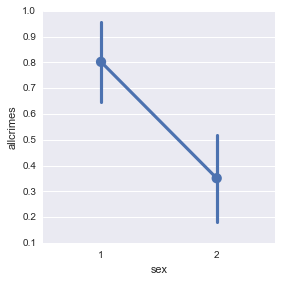

In [38]:
sns.factorplot(x='sex', y='allcrimes', kde='bar', data=reduced_dataset)

In [39]:
#before starting to manipulate the dataset itself, we make a copy to work on it
rdc = reduced_dataset.copy()

In [40]:
ct1 = rdc.groupby('anyarrest').size()*100/len(rdc['anyarrest'])
print(ct1)

anyarrest
0.0    69.327731
1.0    23.319328
dtype: float64


In [41]:
rdc['anyarrest'].value_counts(sort=False, dropna=False, normalize=True)

 0.0    0.693277
 1.0    0.233193
NaN     0.073529
Name: anyarrest, dtype: float64

In [42]:
rdc['cond'].isnull().value_counts()

False    476
Name: cond, dtype: int64

In [43]:
rdc['anyarrest'].isnull().sum()

35

In [44]:
#rdc['anyarrest'].fillna(11, inplace=True)

In [45]:
rdc['anyarrest'].isnull().sum()

35

In [46]:
rdc['anyarrest'] = rdc['anyarrest'].replace(11, np.nan)

In [47]:
rdc['anyarrest'].value_counts()

0.0    330
1.0    111
Name: anyarrest, dtype: int64

In [48]:
living_dic = {1: 1, 2:2, 3:1, 4:1, 5:1, 6:1, 7:1, 8:2}

In [49]:
rdc['living_situation'] = rdc['living_situation'].map(living_dic)

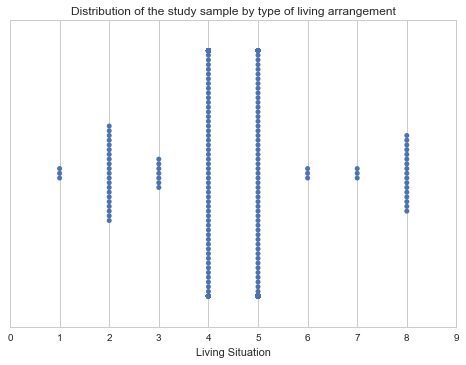

In [152]:
sns.swarmplot('living_situation', data=reduced_dataset)
plt.xlabel('Living Situation')
plt.title('Distribution of the study sample by type of living arrangement')

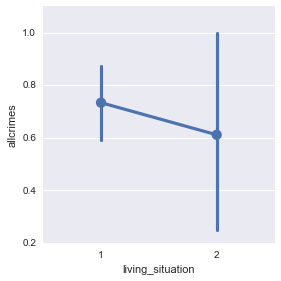

In [142]:
sns.factorplot(x='living_situation', y='allcrimes', data=rdc)

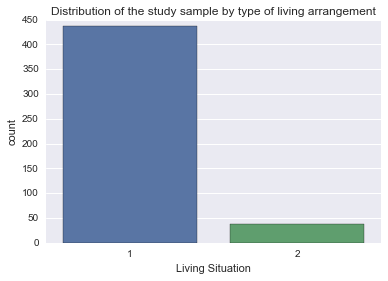

In [149]:
sns.countplot('living_situation', data=rdc)
plt.xlabel('Living Situation')
plt.title('Distribution of the study sample by type of living arrangement')

In [140]:
rdc['age'].describe()  

count     473.0
unique      4.0
top        20.0
freq      178.0
Name: age, dtype: float64

In [51]:
def age_group(x):
    if x < 30:
        return 20
    elif x < 40:
        return 30
    elif x < 50:
        return 40
    elif x < 61:
        return 50

In [52]:
rdc['age'] = rdc['age'].map(age_group)

In [53]:
rdc['age']

0      30.0
1      20.0
2      40.0
3      20.0
4      30.0
5      40.0
6      40.0
7      30.0
8      20.0
9      30.0
10     30.0
11     30.0
12     20.0
13     20.0
14     30.0
15     50.0
16     20.0
17     20.0
18     20.0
19     40.0
20     30.0
21     20.0
22     30.0
23     30.0
24     20.0
25     30.0
26     20.0
27     40.0
28     20.0
29     30.0
       ... 
446    40.0
447    40.0
448    50.0
449    50.0
450    50.0
451    50.0
452     NaN
453    50.0
454    40.0
455    20.0
456    40.0
457    40.0
458    40.0
459    50.0
460    40.0
461    20.0
462    50.0
463    20.0
464    30.0
465    20.0
466    30.0
467    40.0
468    40.0
469    40.0
470    20.0
471    30.0
472    30.0
473    40.0
474    30.0
475    40.0
Name: age, dtype: float64

In [141]:
rdc.groupby('age').describe()

/Users/RI/Anaconda/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


age_binned  age_unprocessed  allarrests   allcrimes    alldrugs  \
age                                                                           
20.0 count         0.0       178.000000  168.000000  168.000000  168.000000   
     mean          NaN        25.044944    0.494048    0.767857    0.708333   
     std           NaN         2.787827    1.110629    1.555262    0.864151   
     min           NaN        18.000000    0.000000    0.000000    0.000000   
     25%           NaN        23.000000         NaN         NaN         NaN   
     50%           NaN        25.000000         NaN         NaN         NaN   
     75%           NaN        27.000000         NaN         NaN         NaN   
     max           NaN        29.000000    9.000000   13.000000    4.000000   
30.0 count         0.0       153.000000  142.000000  142.000000  142.000000   
     mean          NaN        34.568627    0.429577    0.866197    0.767606   
     std           NaN         2.747642    0.886446    1.612139    1.089378   
     min           NaN        30.000000    0.000000    0.000000    0.000000   
     25%           NaN        32.000000         NaN         NaN         NaN   
     50%           NaN        35.000000         NaN         NaN         NaN   
     75%           NaN        37.000000         NaN         NaN         NaN   
     max           NaN        39.000000    5.000000   12.000000    4.000000   
40.0 count         0.0       120.000000  110.000000  110.000000  110.000000   
     mean          NaN        43.316667    0.245455    0.581818    0.700000   
     std           NaN         2.573241    0.706281    1.183850    1.324089   
     min           NaN        40.000000    0.000000    0.000000    0.000000   
     25%           NaN        41.000000         NaN         NaN         NaN   
     50%           NaN        43.000000         NaN         NaN         NaN   
     75%           NaN        45.000000         NaN         NaN         NaN   
     max           NaN        49.000000    6.000000    6.000000    9.000000   
50.0 count         0.0        22.000000   19.000000   19.000000   19.000000   
     mean          NaN        53.000000    0.263158    0.157895    0.473684   
     std           NaN         3.207135    0.561951    0.374634    0.841191   
     min           NaN        50.000000    0.000000    0.000000    0.000000   
     25%           NaN        50.250000         NaN         NaN         NaN   
     50%           NaN        51.500000         NaN         NaN         NaN   
     75%           NaN        54.750000         NaN         NaN         NaN   
     max           NaN        59.000000    2.000000    1.000000    3.000000   

            living_situation  num_arrest  num_reincarc  
age                                                     
20.0 count        178.000000  178.000000    178.000000  
     mean           1.073034    0.786517      0.573034  
     std            0.260926    0.962247      0.749955  
     min            1.000000    0.000000      0.000000  
     25%            1.000000    0.000000      0.000000  
     50%            1.000000    1.000000      0.000000  
     75%            1.000000    1.000000      1.000000  
     max            2.000000    4.000000      4.000000  
30.0 count        153.000000  153.000000    153.000000  
     mean           1.052288    0.699346      0.483660  
     std            0.223337    1.026523      0.708079  
     min            1.000000    0.000000      0.000000  
     25%            1.000000    0.000000      0.000000  
     50%            1.000000    0.000000      0.000000  
     75%            1.000000    1.000000      1.000000  
     max            2.000000    7.000000      3.000000  
40.0 count        120.000000  120.000000    120.000000  
     mean           1.125000    0.400000      0.308333  
     std            0.332106    0.737928      0.645551  
     min            1.000000    0.000000      0.000000  
     25%            1.000000    0.000000      0.000000  
     50%      

In [55]:
#quartile split
rdc['age_unprocessed'] = reduced_dataset['age']
print('Age - 4 categories - quartiles')
age_binned = rdc['age_binned'] = pd.qcut(rdc['age_unprocessed'], 4, labels = ["1=0%tile", "2=25%tile",
                                                 "3=50%tile", "4=75%tile"]).value_counts(sort=False, dropna=True)
print(age_binned)

Age - 4 categories - quartiles
1=0%tile     135
2=25%tile    115
3=50%tile    116
4=75%tile    108
Name: age_unprocessed, dtype: int64


/Users/RI/Anaconda/anaconda/lib/python3.5/site-packages/pandas/indexes/category.py:118: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  data = Categorical(data, categories=categories, ordered=ordered)
/Users/RI/Anaconda/anaconda/lib/python3.5/site-packages/pandas/indexes/category.py:118: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  data = Categorical(data, categories=categories, ordered=ordered)


In [56]:
#Hypothesis testing:
#1. specify the null hypothesis and the alternate hypothesis
#2. choose a sample
#3. assess the evidence
#4. draw conclusions
#Definition: assessing evidence provided by the data in favor or against each hypothesis
#about the population

#a result is statistically significant if it is unlikely to have occurred by chance
#p value is also the type 1 error rate: the number of times we would be wrong in rejecting the
#null hypothesis when it is true
#p=0.03: if we reject the null hypothesis, we would be correct 97/100 times.

#Bivariate statistical tools:
#ANOVA; chi-square; correlation coefficient

#ANOVA F Test: are the differences among the sample means due to true differences among the
#population means, or merely due to sampling variability
#F is the variation among samples means divided by the variation within groups
#for explanatory variables with multiples levels, F test and p value do not tell us why the
#group means are not equal, or how. there are many ways in which this can be the case.

#before performing these analyses, one needs to use the .dropna() function to include only
#valid data

In [57]:
#we will test the null hypothesis that the study condition (subject or control) and number of crimes are not related.
test1_data = rdc[['cond', 'allcrimes']].dropna()
len(test1_data)

441

In [58]:
test1 = smf.ols(formula='allcrimes ~ C(cond)', data=test1_data).fit()
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:              allcrimes   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.019
Date:                Thu, 09 Mar 2017   Prob (F-statistic):              0.156
Time:                        07:11:26   Log-Likelihood:                -791.21
No. Observations:                 441   AIC:                             1586.
Df Residuals:                     439   BIC:                             1595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.8241      0.099      8.304   

In [59]:
#now we examine the means and stds
grouped1_mean = test1_data.groupby('cond').mean()
print(grouped1_mean)

      allcrimes
cond           
0      0.824074
1      0.626667


In [60]:
grouped1_std = test1_data.groupby('cond').std()
print(grouped1_std)

      allcrimes
cond           
0      1.710861
1      1.166190


In [61]:
#we repeat the same analysis with arrests
test2_data = rdc[['cond', 'allarrests']].dropna()
test2 = smf.ols(formula = 'allarrests ~ C(cond)', data=test2_data).fit()
print(test2.summary())

                            OLS Regression Results                            
Dep. Variable:             allarrests   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2401
Date:                Thu, 09 Mar 2017   Prob (F-statistic):              0.624
Time:                        07:11:26   Log-Likelihood:                -593.82
No. Observations:                 441   AIC:                             1192.
Df Residuals:                     439   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.4213      0.063      6.642   

In [62]:
grouped2_mean = test2_data.groupby('cond').mean()
print(grouped2_mean)

      allarrests
cond            
0       0.421296
1       0.377778


In [63]:
grouped2_std = test2_data.groupby('cond').std()
print(grouped2_std)

      allarrests
cond            
0       1.013082
1       0.847499


In [64]:
#we now try to use the grouped age variable as well
rdc['age'] = rdc['age'].astype('category')
test3_data = rdc[['age', 'allcrimes']].dropna()
test3 = smf.ols(formula = 'allcrimes ~ C(age)', data=rdc).fit()
print(test3.summary())

                            OLS Regression Results                            
Dep. Variable:              allcrimes   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.802
Date:                Thu, 09 Mar 2017   Prob (F-statistic):              0.146
Time:                        07:11:26   Log-Likelihood:                -786.67
No. Observations:                 439   AIC:                             1581.
Df Residuals:                     435   BIC:                             1598.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.7679      0.113      6.

In [65]:
#given that we have an explanatory categorical variable with multiple levels, we use the 
#tuckey hsd test
tuckey1 = multi.MultiComparison(test3_data['allcrimes'], test3_data['age'])
res1 = tuckey1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 20.0   30.0   0.0983  -0.3305 0.5272 False 
 20.0   40.0   -0.186  -0.6475 0.2754 False 
 20.0   50.0   -0.61   -1.5206 0.3007 False 
 30.0   40.0  -0.2844  -0.7622 0.1935 False 
 30.0   50.0  -0.7083  -1.6274 0.2108 False 
 40.0   50.0  -0.4239  -1.3586 0.5108 False 
--------------------------------------------


In [66]:
#We will now test two other hypotheses:
#Hypothesis(0)(a): the study condition (0 or 1) and the committing of a crime are independent i.e. there is no
#relationship between them
#Hypothesis(0)(b): there is no relationship between age and being arrested during the study period

In [67]:
#contingency table of observed counts
#when creating contingency tables, we put the response variable first (therefore vertical in table), and the explanatory
#variable second, therefore horizontal at the top of the table.
ct1 = pd.crosstab(rdc['anycrime'], rdc['cond'])
print(ct1)

cond        0    1
anycrime          
0.0       139  154
1.0        77   71


In [68]:
#column percentages
colsum = ct1.sum(axis=0)
colpct = ct1/colsum
print(colpct)

cond             0         1
anycrime                    
0.0       0.643519  0.684444
1.0       0.356481  0.315556


In [69]:
#chi square test
print('chi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

chi-square value, p value, expected counts
(0.65446000714878627, 0.41852260938554675, 1, array([[ 143.51020408,  149.48979592],
       [  72.48979592,   75.51020408]]))


In [70]:
#now the second hypothesis test
rdc['age'] = rdc['age'].astype('category')
rdc['anyarrest'] = rdc['anyarrest'].astype('category')

In [71]:
#contingency table of observed counts
ct2 = pd.crosstab(rdc['anyarrest'], rdc['age'])
print(ct2)

age        20.0  30.0  40.0  50.0
anyarrest                        
0.0         118   105    90    15
1.0          50    37    20     4


In [72]:
#column percentages
colsum2 = ct2.sum(axis=0)
colpct2 = ct2/colsum2
print(colpct2)

age            20.0      30.0      40.0      50.0
anyarrest                                        
0.0        0.702381  0.739437  0.818182  0.789474
1.0        0.297619  0.260563  0.181818  0.210526


In [73]:
#chi square test
print('chi-square value, p value, expected counts')
cs2 = scipy.stats.chi2_contingency(ct2)
print(cs2)

chi-square value, p value, expected counts
(4.9451035874289762, 0.17586134722188973, 3, array([[ 125.52164009,  106.09567198,   82.18678815,   14.19589977],
       [  42.47835991,   35.90432802,   27.81321185,    4.80410023]]))


In [74]:
#We therefore cannot reject the null hypothesis, but given that the explanatory variable has several levels, 
#we cannot know why the null hypothesis was not rejected
#we therefore perform a 2 by 2 comparison

In [75]:
sub1 = rdc.copy()
recode1 = {20:20, 30:30}
sub1['comp1v'] = sub1['age'].map(recode1)

In [153]:
ct3 = pd.crosstab(sub1['cond'], sub1['comp1v'])
print(ct3)

comp1v  20.0  30.0
cond              
0         95    71
1         83    82


In [ ]:
#column percentages
colsum3 = ct3.sum(axis=0)
colpct3 = ct3 / colsum3
print(colpct3)

In [ ]:
#chi square test
print('chi square value, p value, expected values')
cs3 = scipy.stats.chi2_contingency(ct3)
print(cs3)

In [ ]:
recode2 = {20:20, 40:40}
sub1['comp2v'] = sub1['age'].map(recode2)

In [ ]:
ct4 = pd.crosstab(sub1['anyarrest'], sub1['comp2v'])
print(ct4)

In [ ]:
colsum4 = ct4.sum(axis=0)
colpct4 = ct4/colsum4
print(colpct4)

In [ ]:
print('chi square value, p value, expected values')
cs4 = scipy.stats.chi2_contingency(ct4)
print(cs4)

In [ ]:
recode3 = {20:20, 50:50}
sub1['compv3'] = sub1['age'].map(recode3)

In [ ]:
ct5 = pd.crosstab(sub1['anyarrest'], sub1['compv3'])
print(ct5)

In [ ]:
colsum5 = ct5.sum(axis=0)
colpct5 = ct5/colsum5
print(colpct5)

In [ ]:
print('chi square value, p value, expected values')
cs5 = scipy.stats.chi2_contingency(ct5)
print(cs5)

In [ ]:
recode4 = {30:30, 40:40}
sub1['compv4'] = sub1['age'].map(recode4) 

In [ ]:
ct6 = pd.crosstab(sub1['anyarrest'], sub1['compv4'])
print(ct6)

In [ ]:
colsum6 = ct6.sum(axis=0)
colpct6 = ct6 / colsum6
print(colpct6)

In [ ]:
print('chi square value, p value, expected values')
cs6 = scipy.stats.chi2_contingency(ct6)
print(cs6)

In [ ]:
recode6 = {30:30, 50:50}
sub1['compv6'] = sub1['age'].map(recode6)

In [ ]:
ct7 = pd.crosstab(sub1['anyarrest'], sub1['compv6'])
print(ct7)

In [ ]:
colsum7 = ct7.sum(axis=0)
colpct7 = ct7/colsum7
print(colpct7)

In [ ]:
print('chi square value, p value, expected values')
cs7 = scipy.stats.chi2_contingency(ct7)
print(cs7)

In [ ]:
recode7 = {40:40, 50:50}
sub1['compv7'] = sub1['age'].map(recode7)

In [ ]:
ct8 = pd.crosstab(sub1['anyarrest'], sub1['compv7'])
print(ct8)

In [ ]:
colsum8 = ct8.sum(axis=0)
colpct8 = ct8 / colsum8
print(colpct8)

In [ ]:
print('chi square value, p value, expected values')
cs8 = scipy.stats.chi2_contingency(ct8)
print(cs8)

In [ ]:
#now we will test whether there is a relationship between two quantitative variables, age_unprocessed and allcrimes
#for this we use the pearson correlation test
#r, going from -1 to 1 only tells us whether the two variables are linearly related. they may be related in nonlinear ways
#therefore it's always important to look at r in parallel with a scatterplot of the two variables
#r squared is a measure of how much variability in one variable can be explained by the other variable
#to calculate the pearson coefficient we need to remove all missing values

In [ ]:
rdc.columns

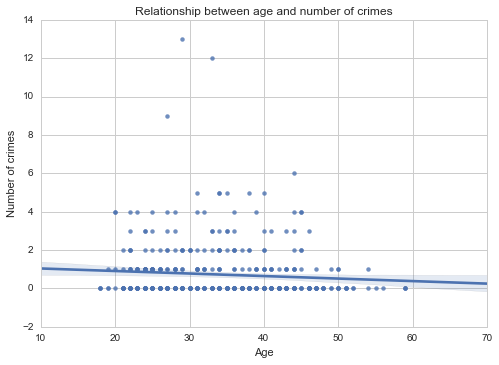

In [154]:
scat1 = sns.regplot(x='age_unprocessed', y='allcrimes', fit_reg=True, data=rdc)
plt.xlabel('Age')
plt.ylabel('Number of crimes')
plt.title('Relationship between age and number of crimes')
scat1

In [ ]:
data_pearson_test = rdc[['age_unprocessed', 'allcrimes']].dropna()

In [ ]:
print('association between age and number of crimes')
print(scipy.stats.pearsonr(data_pearson_test['age_unprocessed'],
                                            data_pearson_test['allcrimes']))

In [ ]:
#a moderator is a third variable that affects the direction and/or strength between your explanatory and response variables
#the question is, is our response variable associated with our explanatory variable, for each level of our third variable?

In [ ]:
#let's see if gender is a moderator variable for test group -> allcrimes

In [ ]:
sub11 = rdc[['cond', 'sex', 'allcrimes']].dropna()

In [ ]:
rdc['sex'].value_counts()

In [ ]:
sub12 = sub11[sub11['sex']==1]
sub13 = sub11[sub11['sex']==2]

In [ ]:
model_12 = smf.ols(formula='allcrimes ~ C(cond)', data=sub12).fit()
print(model_12.summary())

In [ ]:
model_13 = smf.ols(formula='allcrimes ~ C(cond)', data=sub13).fit()
print(model_13.summary())

In [ ]:
sub12.groupby('cond').mean()

In [ ]:
sub12.groupby('cond').std()

In [ ]:
sub13.groupby('cond').mean()

In [ ]:
sub13.groupby('cond').std()

In [ ]:
sns.factorplot(x='cond', y='allcrimes', kind='bar', data=sub12)

In [ ]:
sns.factorplot(x='cond', y='allcrimes', kind='bar', data=sub13)

In [ ]:
#we would test for moderator variables with the chi square test the same way
#divide the population into the sublevels of the third variables
#conduct a chi square test for each to see if the relationship is statistically significant for each level
#we would visualize it with a linegraph factorplot(kind='point')

In [ ]:
#to know if your data is obersevational or experimental, you ask if the explanatory variable was manipulated or not
#data reporting tells you what is happening, but data analysis tells you why it is happening

In [ ]:
#randomization works best as your sample size approaches infinity. for small sizes, imbalances in the groups
#can occur. if you check randomized studies, one of first steps is to check for imbalances between groups
#on covariates. this is also why we can conclude that variables are associated, but hardly that one causes the other
#statistical control: include unbalanced covariates as additional explanatory variables in the study.
#In a true experiment, 3 conditions:
#1. only one variable is manipulated
#2. we have a control group
#3. random assignment
#In theory, in this case one can determine causality
#Quasi experiment:
#1. only one variable is manipulated
#2. control group
#3. no random assignment; groups pre selected. i.e. drug users study.
#To improve a quasi experimental design: add confounding variables; have a control group; use a pre-test/post-test design
#confounder=control variable=covariate=third variable=lurking variable

In [ ]:
#identifying a confounding variable does not allow to establish causation, just to get closer to a causal connection.
#due to infinite number of possible lurking variables, observational studies cannot rly establish causation
#a lurking of confounding variable is a third variable that is associated with both the explanatory and response variables.
#i.e. x=firefighters; y=damage caused by a fire. plot would suggest more firefighters cuases more fire damage.
#in reality there is a third lurking variable that influences both, seriousness of the fire.
#In a study we want to demonstrate that our statistical relationship is valid even after controlling for confounders.

In [ ]:
#Linear regression:
#multivariate linear regression for quantitative response variable
#logistic regression for binary categorical response variable
#Assumptions:
#Normality: residuals from our linear regression model are normally distributed. if they are not,
#our model may be misspecified.
#Linearity: association between explanatory and response variable is linear
#Homoscedasticity (or assumption of constant variance): variability in the response variable is the same at all levels
#of the explanatory variable. i.e. if spread of residuals values increases as you move along x axis, assumption is false.
#Independence: observations are not correlated with each other. Longitudinal data can violate this assumption, as well as
#hierarchical nesting/clustering data i.e. looking at students by classes. this assumption is the most serious
#to be violated, and also cannot be fixed by modifying the variables. the data structure itself is the problem.
#We have to contend with:
#Multicollinearity: explanatory variables are highly correlated with each other. this can mess up your parameter estimates
#or make them highly unstable. Signs: 1. highly associated variable not significant. 2. negative regression coefficient
#that should be positive. 3. taking out an explanatory variable drastically changes the results.
#Outliers: can affect your regression line, meaning it will not fit the data as well as it should.

In [ ]:
#multiple regression model allows us to find the relationship between one explanatory variable and the 
#reponse variable, while controlling (holding constant at 0) all the other variables.
#categorical sex (1 and 2); age restricted to 18-25 group: each variable needs to include a meaningful
#value of 0, so as to make it easier to interpret the coefficients
#for a categorical variable, we can just recode one of the values to be 0
#for a quantitative variable, we have to center it. Centering = subtracting the mean of a variable
#from the value of the variable. We are therefore recoding it so that its mean=0.
#Note: do not center the response variable.

In [ ]:
#We will create a multiple regression model, investigating the relationship between the study group 'cond', 'age', 'sex', 
#and the quantitative response variable 'allcrimes'. We will then do the same for 'allarrests'.
#we will first center the explanatory variables. for categorical variables, one of the categories needs to be 0, for 
#quantitative variables, we need to subtract the mean from each value.

In [81]:
rdc_linear = rdc[['cond', 'age_unprocessed', 'sex', 'allcrimes', 'allarrests']].dropna()
len(rdc_linear)

439

In [83]:
rdc_linear['age_unprocessed_c'] = rdc['age_unprocessed']-rdc['age_unprocessed'].mean()
print(rdc_linear['age_unprocessed_c'].mean())

-0.24115029362859228


In [84]:
rdc_linear['sex'].value_counts()

1    362
2     77
Name: sex, dtype: int64

In [85]:
recode20 = {1:1, 2:0}
rdc_linear['sex_c'] = rdc_linear['sex'].map(recode20)

In [92]:
model20 = smf.ols(formula = 'allcrimes ~ C(cond)', data=rdc_linear).fit()
print(model20.summary())

                            OLS Regression Results                            
Dep. Variable:              allcrimes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.890
Date:                Thu, 09 Mar 2017   Prob (F-statistic):              0.170
Time:                        07:20:13   Log-Likelihood:                -788.43
No. Observations:                 439   AIC:                             1581.
Df Residuals:                     437   BIC:                             1589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.8241      0.099      8.288   

In [93]:
model21 = smf.ols(formula = 'allcrimes ~ C(cond)+age_unprocessed_c', data=rdc_linear).fit()
print(model21.summary())

                            OLS Regression Results                            
Dep. Variable:              allcrimes   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.260
Date:                Thu, 09 Mar 2017   Prob (F-statistic):              0.106
Time:                        07:20:16   Log-Likelihood:                -787.12
No. Observations:                 439   AIC:                             1580.
Df Residuals:                     436   BIC:                             1592.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8186      0.09

In [94]:
model22 = smf.ols(formula = 'allcrimes ~ C(cond)+age_unprocessed_c+C(sex)', data=rdc_linear).fit()
print(model22.summary())

                            OLS Regression Results                            
Dep. Variable:              allcrimes   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.471
Date:                Thu, 09 Mar 2017   Prob (F-statistic):             0.0162
Time:                        07:20:38   Log-Likelihood:                -784.19
No. Observations:                 439   AIC:                             1576.
Df Residuals:                     435   BIC:                             1593.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8988      0.10

In [95]:
model23 = smf.ols(formula = 'allcrimes ~ C(cond)+age_unprocessed_c + I(age_unprocessed_c**2)+C(sex)', data=rdc_linear).fit()
print(model23.summary())

                            OLS Regression Results                            
Dep. Variable:              allcrimes   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.673
Date:                Thu, 09 Mar 2017   Prob (F-statistic):            0.00590
Time:                        07:21:30   Log-Likelihood:                -782.07
No. Observations:                 439   AIC:                             1574.
Df Residuals:                     434   BIC:                             1595.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

In [97]:
model24 = smf.ols(formula = 'allarrests ~ C(cond)', data=rdc_linear).fit()
print(model24.summary())

                            OLS Regression Results                            
Dep. Variable:             allarrests   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2025
Date:                Sat, 11 Mar 2017   Prob (F-statistic):              0.653
Time:                        17:20:34   Log-Likelihood:                -591.96
No. Observations:                 439   AIC:                             1188.
Df Residuals:                     437   BIC:                             1196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.4213      0.064      6.629   

In [99]:
model25 = smf.ols(formula = 'allarrests ~ C(cond)+age_unprocessed_c', data=rdc_linear).fit()
print(model25.summary())

                            OLS Regression Results                            
Dep. Variable:             allarrests   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.519
Date:                Sat, 11 Mar 2017   Prob (F-statistic):             0.0305
Time:                        17:21:10   Log-Likelihood:                -588.55
No. Observations:                 439   AIC:                             1183.
Df Residuals:                     436   BIC:                             1195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.4157      0.06

In [103]:
model26 = smf.ols(formula = 'allarrests ~ C(cond)+age_unprocessed_c+C(sex)', data=rdc_linear).fit()
print(model26.summary())

                            OLS Regression Results                            
Dep. Variable:             allarrests   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.179
Date:                Sat, 11 Mar 2017   Prob (F-statistic):             0.0239
Time:                        17:22:42   Log-Likelihood:                -587.30
No. Observations:                 439   AIC:                             1183.
Df Residuals:                     435   BIC:                             1199.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.4490      0.06

In [102]:
model27 = smf.ols(formula = 'allarrests ~ C(cond)+age_unprocessed_c + I(age_unprocessed_c**2)+C(sex)', data=rdc_linear).fit()
print(model27.summary())

                            OLS Regression Results                            
Dep. Variable:             allarrests   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.409
Date:                Sat, 11 Mar 2017   Prob (F-statistic):             0.0487
Time:                        17:22:34   Log-Likelihood:                -587.24
No. Observations:                 439   AIC:                             1184.
Df Residuals:                     434   BIC:                             1205.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

In [105]:
#group means and sd
print('Mean')
ds1 = rdc_linear.groupby('cond').mean()
print(ds1)

Mean
      age_unprocessed  allcrimes  allarrests  age_unprocessed_c     sex_c
cond                                                                     
0           33.694444   0.824074    0.421296          -0.423699  0.819444
1           34.053812   0.632287    0.381166          -0.064332  0.829596


In [106]:
print('Standard Deviation')
ds2 = rdc_linear.groupby('cond').std()
print(ds2)

Standard Deviation
      age_unprocessed  allcrimes  allarrests  age_unprocessed_c     sex_c
cond                                                                     
0            9.026533   1.710861    1.013082           9.026533  0.385543
1            8.438798   1.169907    0.850545           8.438798  0.376833


In [ ]:
#For each response variable, allcrimes and allarrests, we choose the model that gave us the highest overall
#explanatory power, and run further tests to check for evidence of model misspecification.
#If model is correctly specified, residuals are not correlated with explanatory variables.
#If data fails to meet regression assumptions, or misses explanatory variables, we have model misspecification.
#Intercept = value of response variable when all explanatory variables are held constant at 0

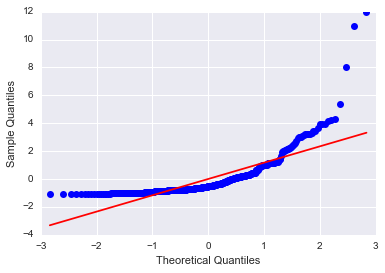

In [110]:
#Q-Q plot for normality
fig4 = sm.qqplot(model23.resid, line='r')
#red line represents residuals we would expect if model residuals were normally distributed
#our residuals below deviate significantly from red line, especially at lower and higher quantiles, meaning they do not
#follow a normal distribution. This means curvilinear association we saw is not fully explained by our model. We could add
#more explanatory variables.

In [ ]:
#normalizing or standardizing values makes them fit a standard normal distribution

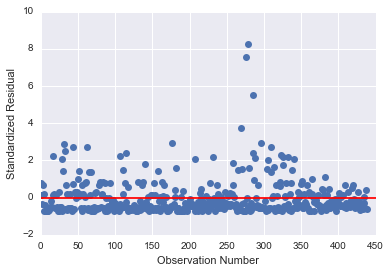

In [111]:
#simple plot of residuals
stdres = pd.DataFrame(model23.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
#resid_pearson normalizes our model's residuals
#ls='none' means points will not be connected
#we expect most residuals to fall within 2sd of the mean. More than 2 are outliers, and more than 3 extreme outliers.
#if more than 1% of our observations have standardized residuals with an absolute value greater than 2.5, or more than 5%
#have one greater than or equal to 2, there is evidence that the fit of the model is poor. largest cause of this is ommission
#of important explanatory variables in our model.


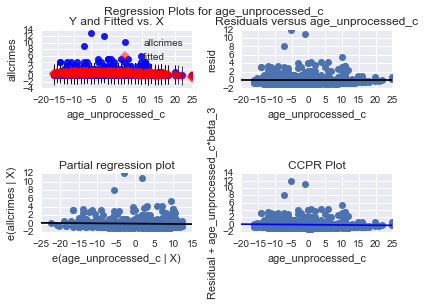

In [113]:
#additional regression diagnostic plots
#fig1 = plt.figure(figsize(12,8))
fig1 = sm.graphics.plot_regress_exog(model23, 'age_unprocessed_c')

Figure(480x320)


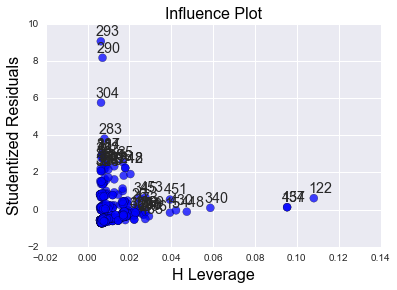

In [114]:
#leverage plot
fig3 = sm.graphics.influence_plot(model23, size=8)
print(fig3)
#we see that we have extreme outliers, but they are low leverage, meaning they do not have an undue influence on our
#estimation of the regression model.
#we also have high leverage observations, but they are not outliers.
#we have no observations that are both high leverage and outliers.

In [ ]:
#now we will apply logistic regression models to the binary response variables anycrime and anyarrest
#the data management has already been performed

In [158]:
rdc_logistic['anycrime'] = pd.to_numeric(rdc_logistic['anycrime'], errors='coerce')
rdc_logistic['anyarrest'] = pd.to_numeric(rdc_logistic['anyarrest'], errors='coerce')

In [159]:
rdc_logistic['cond'] = rdc_logistic['cond'].astype('category')
lreg1 = smf.logit(formula='anyarrest ~ C(cond)', data=rdc_logistic).fit()
print(lreg1.summary())
#equation would be anyarrest = -1.0259-0.1268*cond

Optimization terminated successfully.
         Current function value: 0.563817
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              anyarrest   No. Observations:                  441
Model:                          Logit   Df Residuals:                      439
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Mar 2017   Pseudo R-squ.:               0.0006709
Time:                        15:21:29   Log-Likelihood:                -248.64
converged:                       True   LL-Null:                       -248.81
                                        LLR p-value:                    0.5634
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.0259      0.154     -6.645      0.000        -1.328    -0.723
C(cond)[T.1]    -0.1268

In [164]:
#however, for logistic regression it makes much more sense to calculate the odds ratio
#if OR=1, the model is not statistically significant
#if OR<1, the response variable becomes less likely as the explanatory one increases
#if OR>1, the response variable becomes more likely as the explanatory one increases
print('Odds Ratios')
print(np.exp(lreg1.params))
#Study subjects in the treatment group (cond=1) are 0.88 times as likely to have had an arrest since release on parole
#as study subjects in the control group

Odds Ratios
Intercept       0.358491
C(cond)[T.1]    0.880886
dtype: float64


In [163]:
# odd ratios with 95% confidence intervals
params = lreg1.params
conf = lreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))
#we have 95% confidence that the population odds ratio will be between 0.57 and 1.35.

              Lower CI  Upper CI        OR
Intercept     0.264892  0.485161  0.358491
C(cond)[T.1]  0.572854  1.354554  0.880886


In [ ]:
#Machine learning encompasses a wide range of statistical methods. These can be used for:
#1. Describe associations
#2. Search for patterns
#3. Make predictions
#We typically do not use ML with hypotheses in mind. instead we learn from the data
#We learn from the test set.
#Accuracy = test error rate. The rate at which it correctly classifies or estimates.
#Goal is to minimize test error rate.
#Linear regression: accuracy = mean squared error
#Variance = change in parameter estimates across different data sets
#Bias = how far off model estimated values are from true values
#ideally we want low variance and low bias, but they are negatively associated. As one decreases, the other increases.
#Generally, complexity of model leads to high variance and low bias
#Simple models will have lower variance, but also be more biased.
#Logistic regression: accuracy = how well the model classifies observations

In [ ]:
#Supervised Prediction includes:
#Linear regression
#Pattern recognition
#Discriminant analysis
#Multivariate function estimation
#Supervised ML techniques
#Decision trees
#Like linear regression, decision trees are designed for supervised prediction problems.
#Root node, and terminal nodes or leaves.
#Growing the tree process: binary splits maximize correct classification; all cut points are tested; subgroups showing
#similar outcomes are generated
#Validating the tree: cross validation guards against overfit. A random subset is tested and only 'branches' that improve
#the classification are retained
#Selected sub tree is the lowest probability of misclassification
#Trees allow the handling of many variables that cannot be done as efficiently in linear regression. They can also uncover
#constellations of variables that can predict high or low rates of the response variable.

In [ ]:
#Strengths of decision trees
#Can select from a large number of variables those and their interactions that are most important in determining the
#target or response variable to be explained
#They are easy to interpret and visualize, especially when the tree is small
#Can handle large data sets well and can predict both binary, categorical target variables and also quantitative ones
#Limitations: small changes in the data can lead to different splits and this can undermine the interpretability of the model
#and decision trees are not very reproducible on future data

In [201]:
reduced_dataset_clean = reduced_dataset.dropna()
len(reduced_dataset_clean)

433

In [205]:
predictors = reduced_dataset_clean.ix[:, reduced_dataset_clean.columns != 'allcrimes']

In [206]:
predictors

,cond,sex,age,living_situation,support,allarrests,anyarrest,alldrugs,anydrugs,anycrime,arrest_9mo,reincarc_9mo,num_arrest,num_reincarc,violent_charge,property_charge
0,1,1,30.0,5,11.0,2.0,1.0,2.0,1.0,1.0,1,1,2,2,0,0
1,1,1,26.0,5,11.0,0.0,0.0,1.0,1.0,1.0,1,1,1,1,1,0
2,1,1,46.0,4,9.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,0,1,26.0,4,9.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0
4,0,1,37.0,4,6.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,1,1,41.0,4,9.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0
6,1,1,45.0,5,11.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
7,0,1,30.0,4,9.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
8,0,1,29.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
9,0,1,35.0,4,9.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [207]:
targets = reduced_dataset_clean['allcrimes']

In [208]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size= 0.4)

In [209]:
print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

(259, 16) (174, 16) (259,) (174,)


In [210]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

In [213]:
predictions = classifier.predict(pred_test)

In [215]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[112,   0,   0,   0,   0,   0,   0,   0],
       [  0,  19,   8,   1,   1,   2,   1,   0],
       [  0,   7,   3,   1,   1,   0,   1,   0],
       [  0,   3,   4,   1,   2,   0,   0,   0],
       [  0,   0,   2,   0,   2,   0,   0,   1],
       [  0,   1,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [216]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.78735632183908044

In [ ]:
#Random forests
#Forests of trees
#Splits on only ONE variable in each node. Variable with largest association with Target among
#candidate variables. Only among variables randomly selected to be tested for that node.
#First a subset of explanatory variables is selected at random
#Next the node is split with the Best variable of the subset. After this node is split, a new list of subset variables
#is selected at random to split on the next node.
#typical k fold values: 5 or 10

In [219]:
classifier2 = RandomForestClassifier(n_estimators=25)
classifier2 = classifier.fit(pred_train, tar_train)

In [221]:
predictions2 = classifier2.predict(pred_test)

In [222]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[112,   0,   0,   0,   0,   0,   0],
       [  0,  20,   7,   2,   1,   2,   0],
       [  0,   7,   3,   1,   1,   0,   1],
       [  0,   3,   3,   1,   3,   0,   0],
       [  0,   0,   2,   1,   2,   0,   0],
       [  0,   1,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [223]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.7931034482758621

In [224]:
#fit an extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train, tar_train)
#display the relative importance of each attribute
print(model.feature_importances_)

[ 0.04472255  0.01493451  0.05962542  0.04225549  0.06900537  0.05969145
  0.03740676  0.04925347  0.04173209  0.46073854  0.00651952  0.02053235
  0.03376509  0.02278637  0.01254948  0.02448154]


In [227]:
trees = range(25)
accuracy = np.zeros(25)

In [228]:
for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators = idx + 1)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)
    accuracy[idx] = sklearn.metrics.accuracy_score(tar_test, predictions)

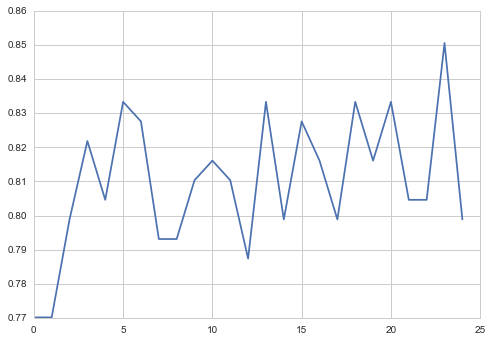

In [229]:
plt.cla()
plt.plot(trees, accuracy)

In [230]:
#Lasso regression
#penalized regression method
#supervised learning method
#shrinkage and selection method
#shrinkage = constraints on parameters that shrinks coefficients to 0
#selection = identifies most imp. variables associated with response variable
#Can increase prediction accuracy and improve model interpretability vs standard OLS
#When lambda=0, it becomes OLS regression
#Bias increases and variance decreases as lambda increases
#in Lasso regression, penalty is not fair if variables are not on the same scale
#standardize all predictor variables to have means equal to 0 and sd = 1
#Lasso regression has several algorithms, among them LAR (least angle regression-)
#sklearn library refers to the penalty term as 'alpha'

In [ ]:
#Limitations of lasso regression
#1. Selection of variables is 100% statistically driven
#2. If predictors are correlated, lasso arbitrarily selects one
#3. Estimating p values is not straightforward
#4. Different selection methods or statistical softwares can provide different results
#5. No guarantee that selected model is not overfitted nor that it's the best model
#All regression models can produce meaningless models without human intervention
#Best approach is a combination of ML, human intervention, and independent application


In [ ]:
#Cluster analysis
#Unsupervised learning method = no response variable included in the analysis
#Goal: to have less variance within clusters, and more between clusters
#Can also be used as a method of data reduction, to reduce number of variables
#to the number of categorical variables equal to the clusters produced
#Canonical discriminant analysis:
#creates a smaller number of variables
#linear combinations of clustering variables
#canonical variables are ordered by proportion of variance accounted for
#majority of variance is accounted for by first few canonical variables